## Práctica 2
Allen Giankarlo Román Vásquez

202004745

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('datos.csv')
df

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36 reviews,NaN,[],"['Week 1 - Get Ready', 'Session 2 - Get Set', ...",['William J. White'],['Northwestern University'],Social Sciences,https://www.coursera.org/learn/power-onboarding
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,NaN,NaN,77 reviews,Creating engaging parent surveys using Google ...,"['Education', 'online tools', 'engagement', 'e...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/education-fe...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10 reviews,NaN,[],"['Week 1', 'WEEK 2']",['Pablo Palomino'],['Emory University'],Social Sciences,https://www.coursera.org/learn/makingprogress
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,NaN,11 reviews,Learn about choice boards and their use within...,"['Teaching tools', 'elementary teaching', 'eng...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/use-microsof...


### Limpieza de datos

In [201]:
# Eliminar duplicados
df = df.drop_duplicates()

# Define una función para extraer la duración en horas
def extract_hours(duration):
    if pd.isna(duration):
        return 0.0
    if 'months' in duration:
        # Extraer el número de meses
        months = int(duration.split()[0])
        # Extraer el número de horas por semana
        words = duration.split()
        if 'hours' in words:
            hours_index = words.index('hours') - 1  # El índice de la palabra justo antes de 'hours'
            hours_per_week = int(words[hours_index])
        else:
            hours_per_week = 0
        # Calcular las horas totales
        return float(months * 4 * hours_per_week)  # Suponiendo 4 semanas en un mes
    if 'hours' in duration:
        # Extraer el número de horas del string
        if 'Approx' in duration:
            return float(duration.split()[1])
        else:
            # Si la duración no tiene números
            if not any(char.isdigit() for char in duration):
                return 0.0
            else:
                # si viene X-Y horas, mandar Y
                if '-' in duration:
                    return float(duration.split('-')[1].split()[0])
                else:
                    return float(duration.split()[0])
                
    else:
        return 0.0



# Aplica la función a la columna 'Duration'
df['Duration_hours'] = df['Duration'].apply(extract_hours)

df['Review'] = df['Review'].str.replace(',', '').str.extract(r'(\d+)').astype(float)

# Reemplazar valores faltantes en 'Rating', 'Review', 'Duration' y 'Schedule'
df.fillna({'Rating': 0, 'Review': 0, 'Duration': 0, 'Schedule': 'NINGUNO','Duration_hours': 0}, inplace=True)

# Mostrar el DataFrame limpio
df

C:\Users\gian-\AppData\Local\Temp\ipykernel_149912\657479557.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_hours'] = df['Duration'].apply(extract_hours)
C:\Users\gian-\AppData\Local\Temp\ipykernel_149912\657479557.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'] = df['Review'].str.replace(',', '').str.extract(r'(\d+)').astype(float)
C:\Users\gian-\AppData\Local\Temp\ipykernel_149912\657479557.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration_hours
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,2813.0,NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100.0,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227.0,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0
3,Distribución digital de la música independiente,0.0,Beginner level,Approx. 8 hours to complete,Flexible schedule,0.0,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582.0,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,14 hours (approximately),Flexible schedule,30.0,NaN,[],"['Introducción al curso', 'Control de acceso y...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-secur...,14.0
8691,Computational Thinking for K-12 Educators: Nes...,0.0,Beginner level,11 hours (approximately),Flexible schedule,0.0,NaN,"['Education', 'want', 'Resource', 'Causality']","['Course Orientation', 'Nested If/Else Part 1'...",['Beth Simon'],['University of California San Diego'],Social Sciences,https://www.coursera.org/learn/block-programmi...,11.0
8692,Cómo combinar y analizar datos complejos,0.0,NaN,Approx. 9 hours to complete,Flexible schedule,0.0,NaN,[],"['Estimación básica', 'Modelos', 'Vinculación ...","['Richard Valliant, Ph.D.']","['University of Maryland, College Park']",Social Sciences,https://www.coursera.org/learn/data-collection...,9.0
8693,Architecting with Google Kubernetes Engine: Wo...,0.0,Intermediate level,19 hours (approximately),Flexible schedule,0.0,NaN,[],"['Introdução ao curso', 'Operações do Kubernet...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-workl...,19.0


Se realizó la limpieza reemplazandod los valores nulos en las columnas `rating`, `review`, `duration` y `schedule` por 0, 'NINGUNO', '0' y 'NINGUNO' respectivamente. Finalmente, se reemplazaron los valores nulos en el resto de columnas por 'NINGUNO'. También se eliminaron las filas duplicadas.

### Cálculo del promedio de calificaciones para cada curso

In [202]:
promedio_calificacion = df.groupby('Course Title')['Rating'].mean()
promedio_calificacion = promedio_calificacion.sort_values(ascending=False)
#Mostrar todos los cursos en una tabla con su id, titulo, rating
promedio_calificacion_df = pd.DataFrame(promedio_calificacion)
promedio_calificacion_df.reset_index(inplace=True)
promedio_calificacion_df

,Course Title,Rating
0,Scrum Master Specialization,5.0
1,Compromiso del paciente: resultados clínicos s...,5.0
2,Road to the CISO – Culminating Project Course,5.0
3,Uncommon Sense Teaching: Teaching Online,5.0
4,Global Health Challenges and Governance Specia...,5.0
...,...,...
6387,CAD/BIM技術與應用專項課程（CAD/BIM Specialization),0.0
6388,Diversity and Belonging in Businesses and Orga...,0.0
6389,Science of Firearm Injury Prevention Among Chi...,0.0
6390,CFD Simulation um einen Spoiler,0.0


El promedio de calificaciones para cada curso se calculó agrupando por el nombre del curso y calculando el promedio de la columna `rating`. Se ordenaron los cursos de mayor a menor promedio y se mostraron los 5 cursos con mayor promedio y los 5 cursos con menor promedio.

### Cursos con mayor y menor rating

##### Cursos con mayor rating

In [203]:
# Cursos con mayor rating
curso_mayor_rating = promedio_calificacion_df.iloc[0]

# Obtener el rating del curso con mayor rating
rating_max = curso_mayor_rating['Rating']

# Filtrar los cursos con el mismo rating que el curso con mayor rating
cursos_mismo_rating_max = promedio_calificacion_df[promedio_calificacion_df['Rating'] == rating_max]


# Convertir a DataFrame para una mejor visualización
df_cursos_mismo_rating_max = pd.DataFrame(cursos_mismo_rating_max)


df_cursos_mismo_rating_max

,Course Title,Rating
0,Scrum Master Specialization,5.0
1,Compromiso del paciente: resultados clínicos s...,5.0
2,Road to the CISO – Culminating Project Course,5.0
3,Uncommon Sense Teaching: Teaching Online,5.0
4,Global Health Challenges and Governance Specia...,5.0
...,...,...
56,Anatomy & Physiology: Support & Movement,5.0
57,"Question Reality! Science, philosophy, a searc...",5.0
58,Data Analytics in Sports Law and Management Sp...,5.0
59,Engineering of Structures: Response of Structures,5.0


In [204]:
# Cursos con menor rating
curso_menor_rating = promedio_calificacion_df.iloc[-1]

# Obtener el rating del curso con menor rating
rating_min = curso_menor_rating['Rating']

# Filtrar los cursos con el mismo rating que el curso con menor rating
cursos_mismo_rating_min = promedio_calificacion_df[promedio_calificacion_df['Rating'] == rating_min]

# Convertir a DataFrame para una mejor visualización
df_cursos_mismo_rating_min = pd.DataFrame(cursos_mismo_rating_min)

df_cursos_mismo_rating_min

,Course Title,Rating
5145,Становление современной Украины,0.0
5146,Agent-based Generative Art | NetLogo,0.0
5147,The Fundamentals of RDMA Programming,0.0
5148,"현대 로봇공학, 강좌 4: 로봇 동작 계획 및 제어",0.0
5149,Health Impacts of Chemicals in Consumer Products,0.0
...,...,...
6387,CAD/BIM技術與應用專項課程（CAD/BIM Specialization),0.0
6388,Diversity and Belonging in Businesses and Orga...,0.0
6389,Science of Firearm Injury Prevention Among Chi...,0.0
6390,CFD Simulation um einen Spoiler,0.0


Hay 61 cursos que empatan con el mayor rating de 5.0. Entre ellos se encuentran cursos como "Anatomy & Physiology: Support & Movement" y "Scrum Master Specialization" que tienen un rating de 5.0. Y hay 1247 cursos que empatan con el menor rating de 0.0. Entre ellos se encuentran cursos como "CFD Simulation um einen Spoiler" y "Становление современной Украины".

### Porcentaje de cursos con horario flexible en relación con el total de cursos

In [205]:
total_cursos = len(df)
cursos_flexibles = len(df[df['Schedule'].str.contains('Flexible schedule', case=False, na=False)])
porcentaje_cursos_flexibles = (cursos_flexibles/ total_cursos)  * 100

print(f'Porcentaje de cursos con horario flexible: {porcentaje_cursos_flexibles:.2f}%')

Porcentaje de cursos con horario flexible: 92.63%


El porcentaje de cursos con horario flexible en relación con el total de cursos es 92.63%.

## Gráficos Solicitados

### Gráfico 1: Número de cursos en cada nivel de dificultad

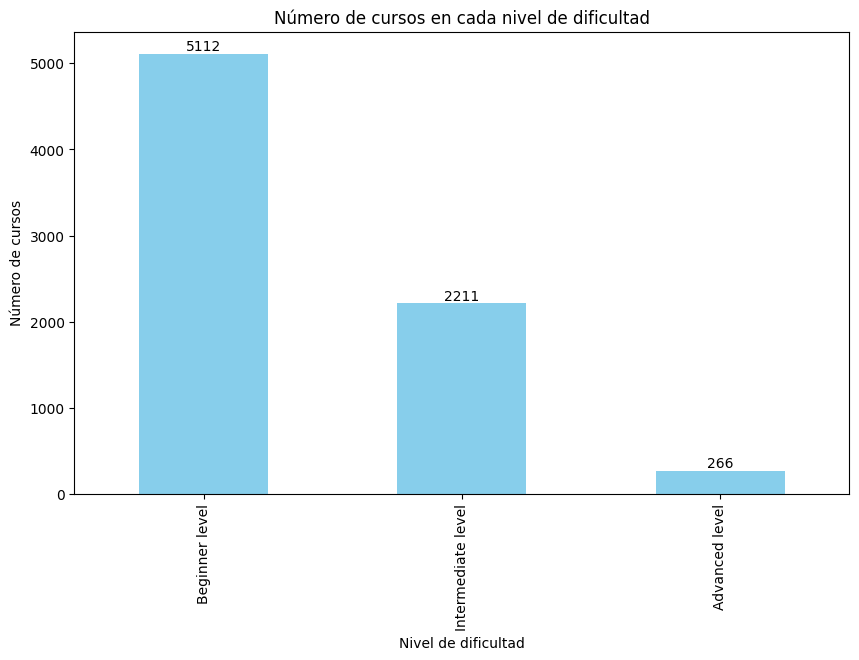

In [206]:
# Filtrar llos valores nulos de la columna Level
df_filtered = df[df['Level'] != 'NINGUNO']

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = df_filtered['Level'].value_counts().plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
for i, v in enumerate(df_filtered['Level'].value_counts()):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Número de cursos en cada nivel de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Número de cursos')
plt.show()

La mayoría de cursos tienen un nivel de dificultad Beginner, seguido de Intermediate y Advanced. Lo que indica que la mayoría de cursos son para principiantes porque son los que tienen mayor demanda ya que son los que más personas buscan.

### Gráfico 2: Número de cursos en cada nivel de dificultad

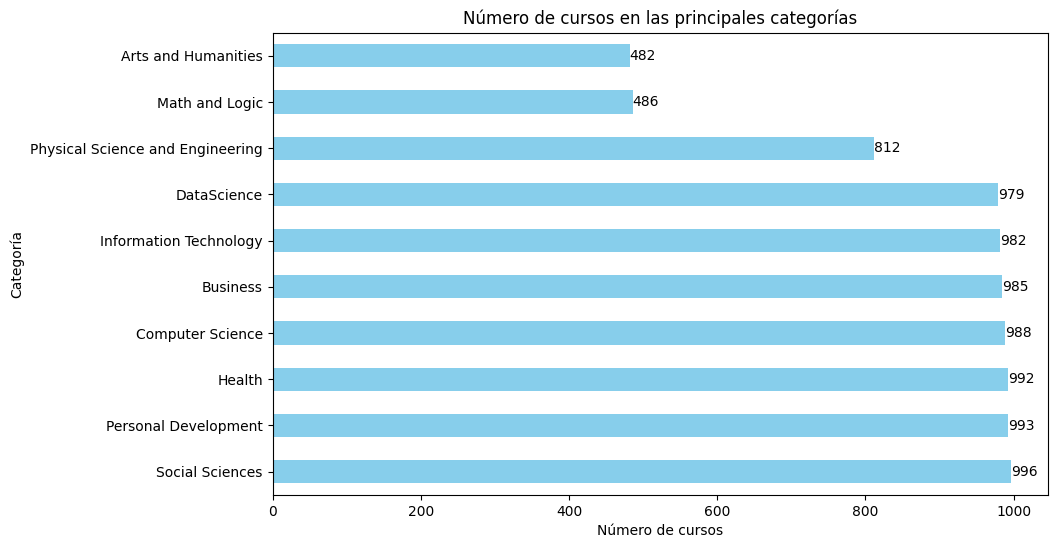

In [207]:
# Obtener las principales categorías
top_categorias = df['Keyword'].value_counts().nlargest(10)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
ax = top_categorias.plot(kind='barh', color='skyblue')

# Agregar etiquetas con los valores numéricos
for i, v in enumerate(top_categorias):
    ax.text(v + 0.1, i, str(v), ha='left', va='center')

# Agregar etiquetas
plt.xlabel('Número de cursos')
plt.ylabel('Categoría')
plt.title('Número de cursos en las principales categorías')
plt.show()



Las categorías de cursos con mayor rating son "Social Sciences", "Personal Development" y "Health". Mientras que las categorías con menor rating son "Physical Science and Engineering", "Math and Logic" y "Arts and Humanities".

### Gráfico 3: Relación entre la duración del curso y el número de revisiones.

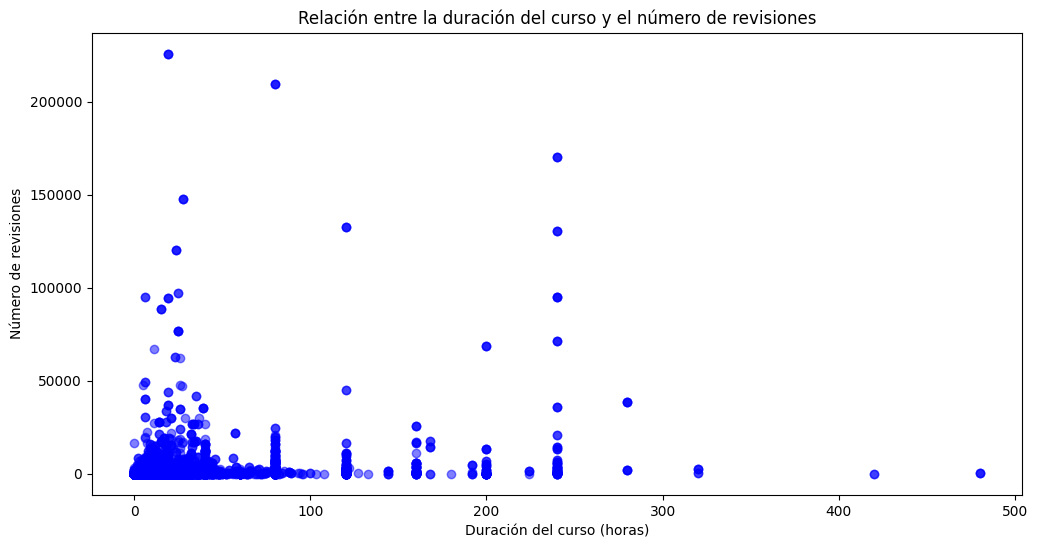

In [208]:
# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df['Duration_hours'], df['Review'], alpha=0.5, color='blue')

# Agregar etiquetas y título
plt.title('Relación entre la duración del curso y el número de revisiones')
plt.xlabel('Duración del curso (horas)')
plt.ylabel('Número de revisiones')

# Mostrar el gráfico
plt.show()

La relación entre la duración del curso y el número de revisiones es que a mayor duración del curso, menor número de revisiones. Esto puede deberse a que los cursos más largos son más difíciles y requieren más tiempo para completarlos, por lo que menos personas los completan y dejan una revisión.

### Gráfico 4: Histograma de la distribución de las duraciones de los cursos.

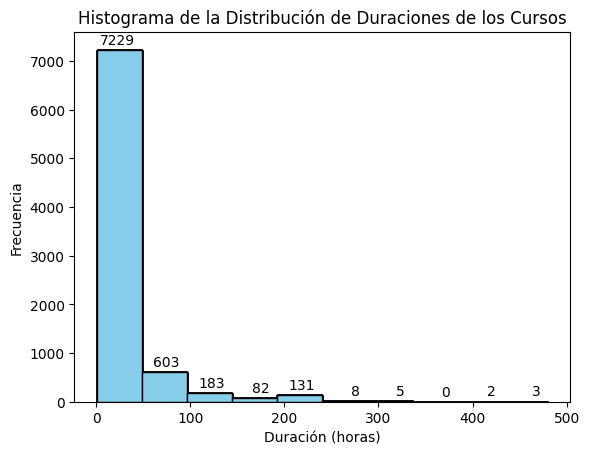

In [233]:
import matplotlib.pyplot as plt

# Eliminar valores 0 en la duración
duraciones = df[df['Duration_hours'] != 0.0]['Duration_hours'].astype(float)

# Crear el histograma
plt.hist(duraciones, bins=10, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Distribución de Duraciones de los Cursos')

# Agregar los números a cada barra
for i, value in enumerate(plt.hist(duraciones, bins=10, color='skyblue', edgecolor='black')[0]):
    plt.text(plt.hist(duraciones, bins=10, color='skyblue', edgecolor='black')[1][i]+40, value+60, str(int(value)), ha='right', va='bottom')



# Mostrar el histograma
plt.show()


Como era de esperarse, la mayoría de cursos tienen una duración de 0 a 50 horas. Lo que indica que la mayoría de cursos son cortos y fáciles de completar.

### Gráfico 5: Gráfico de cajas para visualizar la distribución de las calificaciones de los cursos por nivel de dificultad

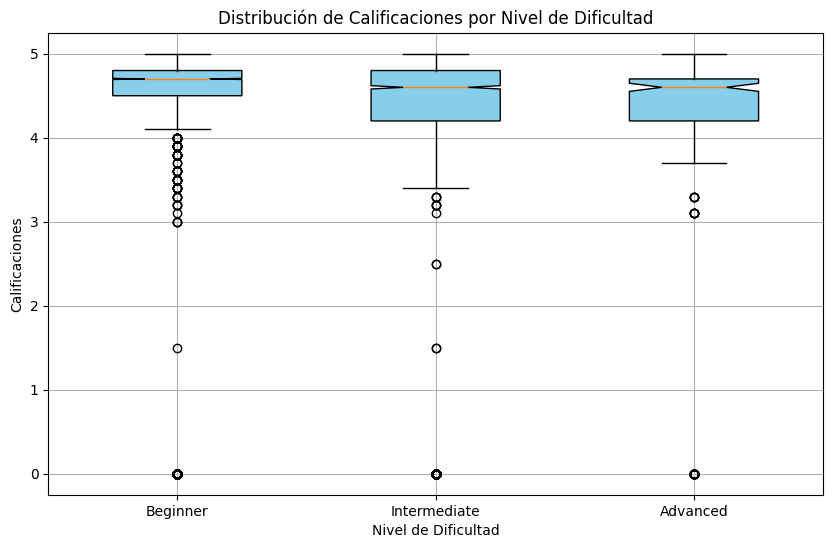

In [241]:
#Mapear los valores de la columna Level a un valor numérico
difficulty_mapping = {'Beginner level': 1, 'Intermediate level': 2, 'Advanced level': 3}
df.loc[:, 'Level_num'] = df['Level'].map(difficulty_mapping)

# Crear el gráfico de caja
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Level_num'] == i]['Rating'] for i in range(1, 4)], 
            labels=['Beginner', 'Intermediate', 'Advanced'], 
            patch_artist=True, notch=True, widths=0.5, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Calificaciones')
plt.title('Distribución de Calificaciones por Nivel de Dificultad')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Como era de esperarse, los cursos con nivel de dificultad Beginner tienen una calificación promedio más alta que los cursos con nivel de dificultad Intermediate y Advanced. Esto puede deberse a que los cursos para principiantes son más fáciles y por lo tanto más personas los completan y dejan una calificación.

## Conclusión General

Después de analizar los datos, se puede concluir que la mayoría de cursos son para principiantes, tienen una duración de 0 a 50 horas y tienen un rating de 5.0. Además, los cursos con nivel de dificultad Beginner tienen una calificación promedio más alta que los cursos con nivel de dificultad Intermediate y Advanced.

También que a mayor duración del curso, menor número de revisiones. Y que las categorías de cursos con mayor rating son "Social Sciences", "Personal Development" y "Health". Mientras que las categorías con menor rating son "Physical Science and Engineering", "Math and Logic" y "Arts and Humanities".

Lo que indica que los cursos para principiantes son los más populares y los mejor calificados, mientras que los cursos para niveles intermedios y avanzados son menos populares y tienen una calificación promedio más baja.

También se puede concluir que la mayoría de cursos tienen un horario flexible, lo que indica que la mayoría de cursos son en línea y se pueden tomar en cualquier momento.



### Conclusión del uso de Python

Python es un lenguaje de programación muy poderoso y versátil que se puede utilizar para realizar análisis de datos, limpieza de datos, visualización de datos y mucho más. En este caso, se utilizó Python para limpiar los datos, calcular el promedio de calificaciones para cada curso, encontrar los cursos con mayor y menor rating, calcular el porcentaje de cursos con horario flexible en relación con el total de cursos y crear gráficos para visualizar los datos.

Las bibliotecas de Python como pandas, numpy, matplotlib facilitan el análisis de datos y la visualización de datos. Con Python, se pueden realizar análisis de datos complejos de una manera sencilla y eficiente.